<a href="https://colab.research.google.com/github/alex-pakalniskis/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [10]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-02-12 23:57:58--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.129.53
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.129.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  13.3MB/s    in 16s     

2020-02-12 23:58:15 (12.1 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [11]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [12]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01/instacart_2017_05_01


In [13]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

---

I need "product_name", "product_id", and "order_id" columns

In [0]:
##### YOUR CODE HERE #####

In [0]:
import pandas as pd
import seaborn as sns
sns.set(palette="colorblind")

In [0]:
aisles_df = pd.read_csv("aisles.csv")
departments_df = pd.read_csv("departments.csv")
order_products_prior_df = pd.read_csv("order_products__prior.csv")
order_products_train_df = pd.read_csv("order_products__train.csv")
orders_df = pd.read_csv("orders.csv")
products_df = pd.read_csv("products.csv")


In [17]:
print("aisles_df columns:",aisles_df.columns.tolist())
print("departments_df columns:",departments_df.columns.tolist())
print("order_products_prior_df columns:",order_products_prior_df.columns.tolist())
print("order_products_train_df columns:",order_products_train_df.columns.tolist())
print("orders_df columns:",orders_df.columns.tolist())
print("products_df columns:",products_df.columns.tolist())

aisles_df columns: ['aisle_id', 'aisle']
departments_df columns: ['department_id', 'department']
order_products_prior_df columns: ['order_id', 'product_id', 'add_to_cart_order', 'reordered']
order_products_train_df columns: ['order_id', 'product_id', 'add_to_cart_order', 'reordered']
orders_df columns: ['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
products_df columns: ['product_id', 'product_name', 'aisle_id', 'department_id']


In [0]:
top_10_products = ["Banana",
                   "Bag of Organic Bananas",
                   "Organic Strawberries",
                   "Organic Baby Spinach",
                   "Organic Hass Avocado",
                   "Organic Avocado",
                   "Large Lemon",
                   "Strawberries",
                   "Limes",
                   "Organic Whole Milk"]

In [19]:
products_subset_df = products_df[["product_name","product_id"]][products_df["product_name"].isin(top_10_products)]

products_subset_df

,product_name,product_id
13175,Bag of Organic Bananas,13176
16796,Strawberries,16797
21136,Organic Strawberries,21137
21902,Organic Baby Spinach,21903
24851,Banana,24852
26208,Limes,26209
27844,Organic Whole Milk,27845
47208,Organic Hass Avocado,47209
47625,Large Lemon,47626
47765,Organic Avocado,47766


In [20]:
order_products_subset_df = pd.concat([order_products_prior_df, order_products_train_df])[["order_id","product_id"]]

order_products_subset_df

,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035
...,...,...
1384612,3421063,14233
1384613,3421063,35548
1384614,3421070,35951
1384615,3421070,16953


In [21]:
merged_orders_and_products_df = pd.merge(products_subset_df, order_products_subset_df, how="inner", on="product_id")

merged_orders_and_products_df

,product_name,product_id,order_id
0,Bag of Organic Bananas,13176,5
1,Bag of Organic Bananas,13176,27
2,Bag of Organic Bananas,13176,29
3,Bag of Organic Bananas,13176,32
4,Bag of Organic Bananas,13176,42
...,...,...,...
2418309,Organic Avocado,47766,3419827
2418310,Organic Avocado,47766,3420232
2418311,Organic Avocado,47766,3420257
2418312,Organic Avocado,47766,3420578


In [22]:
merged_orders_and_products_df["product_name"].value_counts(dropna=False)

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

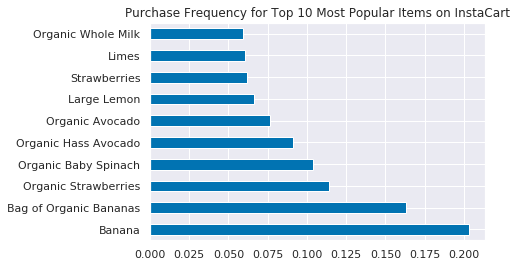

In [23]:
merged_orders_and_products_df["product_name"].value_counts(dropna=False, normalize=True).plot(kind="barh", title="Purchase Frequency for Top 10 Most Popular Items on InstaCart")

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.

# See https://github.com/alex-pakalniskis/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data.ipynb for my lecture code


- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [24]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
# table2 -> tidy

In [26]:
tidy = pd.melt(table2.reset_index(),id_vars="index")
tidy

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [27]:
tidy = tidy.rename(columns={"index":"trt","variable":"name","value":"result"})
tidy.trt = tidy.trt.str.replace('treatment', '')

tidy

,trt,name,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


In [0]:
# tidy -> table2

In [29]:
wide = tidy.pivot_table(values="result",index="trt",columns="name")

wide

name,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


In [30]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


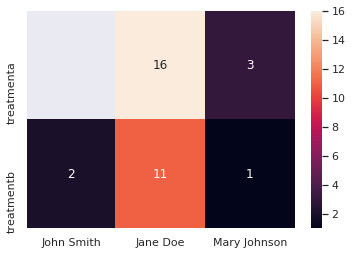

In [31]:
sns.heatmap(table2, annot=True)

In [0]:
flights = sns.load_dataset('flights')

In [0]:
# Flights Pivot Table

In [34]:
print(flights.shape)
flights.head()

(144, 3)


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [35]:
flights_pivot_table = pd.pivot_table(flights, index="year", columns="month")

flights_pivot_table

passengers                       ...                                    
month    January February March April  ... September October November December
year                                   ...                                    
1949         112      118   132   129  ...       136     119      104      118
1950         115      126   141   135  ...       158     133      114      140
1951         145      150   178   163  ...       184     162      146      166
1952         171      180   193   181  ...       209     191      172      194
1953         196      196   236   235  ...       237     211      180      201
1954         204      188   235   227  ...       259     229      203      229
1955         242      233   267   269  ...       312     274      237      278
1956         284      277   317   313  ...       355     306      271      306
1957         315      301   356   348  ...       404     347      305      336
1958         340      318   362   348  ...       404     359      310      337
1959         360      342   406   396  ...       463     407      362      405
1960         417      391   419   461  ...       508     461      390      432

[12 rows x 12 columns]

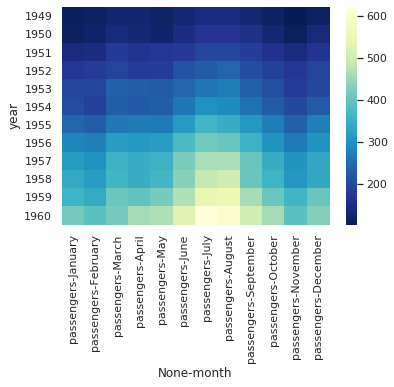

In [36]:
sns.heatmap(flights_pivot_table, cmap="YlGnBu_r")

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

Let's subset for products with more than 2900 orders

In [38]:
cleaned_products_df = products_df[["product_name","product_id"]]

cleaned_products_df

,product_name,product_id
0,Chocolate Sandwich Cookies,1
1,All-Seasons Salt,2
2,Robust Golden Unsweetened Oolong Tea,3
3,Smart Ones Classic Favorites Mini Rigatoni Wit...,4
4,Green Chile Anytime Sauce,5
...,...,...
49683,"Vodka, Triple Distilled, Twist of Vanilla",49684
49684,En Croute Roast Hazelnut Cranberry,49685
49685,Artisan Baguette,49686
49686,Smartblend Healthy Metabolism Dry Cat Food,49687


In [39]:
order_products_subset_df

,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035
...,...,...
1384612,3421063,14233
1384613,3421063,35548
1384614,3421070,35951
1384615,3421070,16953


In [40]:
order_products_subset_df["product_id"].value_counts(dropna=False)

24852    491291
13176    394930
21137    275577
21903    251705
47209    220877
          ...  
42235         1
5255          1
44495         1
36079         1
20759         1
Name: product_id, Length: 49685, dtype: int64

In [41]:
ops_df = pd.DataFrame(order_products_subset_df["product_id"].value_counts(dropna=False).copy()).reset_index()

ops_df.rename(columns={"index":"product_id","product_id":"value_count"}, inplace=True)

ops_df

,product_id,value_count
0,24852,491291
1,13176,394930
2,21137,275577
3,21903,251705
4,47209,220877
...,...,...
49680,42235,1
49681,5255,1
49682,44495,1
49683,36079,1


In [42]:
popular_product_ids_df = ops_df[ops_df["value_count"] > 2900]

popular_product_ids_df

,product_id,value_count
0,24852,491291
1,13176,394930
2,21137,275577
3,21903,251705
4,47209,220877
...,...,...
2046,38533,2905
2047,35734,2902
2048,21038,2902
2049,44787,2902


In [43]:
product_names_and_value_counts_df = pd.merge(cleaned_products_df, popular_product_ids_df, how="inner", on="product_id")

product_names_and_value_counts_df

,product_name,product_id,value_count
0,Peanut Butter Cereal,34,6779
1,European Cucumber,45,19038
2,Wild Albacore Tuna No Salt Added,79,3755
3,English Muffins,116,4518
4,Petit Suisse Fruit,117,3756
...,...,...,...
2046,Classic Hummus Family Size,49605,6134
2047,100% Lactose Free Fat Free Milk,49610,7556
2048,Challah Bread,49621,4802
2049,Yoghurt Blueberry,49628,5085


In [44]:
product_names_and_value_counts_df.sort_values("value_count", ascending=False).head()

,product_name,product_id,value_count
1028,Banana,24852,491291
538,Bag of Organic Bananas,13176,394930
865,Organic Strawberries,21137,275577
900,Organic Baby Spinach,21903,251705
1948,Organic Hass Avocado,47209,220877


These are not frozen dairy desserts!

Now let's associate order_hour_of_day with product id/name

In [45]:
order_products_subset_df.head()

,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035


In [46]:
popular_product_ids_df.head()

,product_id,value_count
0,24852,491291
1,13176,394930
2,21137,275577
3,21903,251705
4,47209,220877


In [47]:
orders_subset_df = orders_df[['order_hour_of_day','order_id']]

orders_subset_df.head()

,order_hour_of_day,order_id
0,8,2539329
1,7,2398795
2,12,473747
3,7,2254736
4,15,431534


Do a double merge to join the relevant columns into a single table

In [48]:
popular_ids_hours_and_value_counts_df = pd.merge(pd.merge(order_products_subset_df,popular_product_ids_df), orders_subset_df)

popular_ids_hours_and_value_counts_df

,order_id,product_id,value_count,order_hour_of_day
0,2,33120,20234,9
1,2,28985,70076,9
2,2,9327,6569,9
3,2,17794,75233,9
4,26,33120,20234,16
...,...,...,...,...
22450881,2778828,16995,3228,7
22450882,2873433,16995,3228,10
22450883,3102649,16995,3228,20
22450884,3269521,16995,3228,15


Here I ran into a roadblock, but found this tremendously helpful article to finish the job: https://www.kaggle.com/shwong/the-instacart-chart

Tally the product orders by hour 
Create a new column with values for each order hour of day/product id combination, i.e. relative contribution of each hour of day to total purchases by product

In [103]:
# Create a new dataframe with the sum of total orders by each order hour for popular products
product_orders_by_hour = pd.DataFrame({'count': popular_ids_hours_and_value_counts_df.groupby(['product_id', 'order_hour_of_day']).size()}).reset_index()
product_orders_by_hour

,product_id,order_hour_of_day,count
0,34,0,23
1,34,1,18
2,34,2,11
3,34,3,5
4,34,4,5
...,...,...,...
49195,49683,19,4044
49196,49683,20,3140
49197,49683,21,2551
49198,49683,22,2095


In [104]:
# Create a normalized column using a lambda function, then display a full day of results (24 hours) for one product
product_orders_by_hour['pct'] = product_orders_by_hour.groupby('product_id')['count'].apply(lambda x: x/x.sum()*100)
product_orders_by_hour.head(24)

,product_id,order_hour_of_day,count,pct
0,34,0,23,0.339283
1,34,1,18,0.265526
2,34,2,11,0.162266
3,34,3,5,0.073757
4,34,4,5,0.073757
5,34,5,15,0.221272
6,34,6,57,0.840832
7,34,7,202,2.979791
8,34,8,402,5.930078
9,34,9,509,7.508482


Calculate the mean hour of purchase for each product
Again, use a lambda function in-line

In [105]:
mean_hour = pd.DataFrame({'mean_hour': product_orders_by_hour.groupby('product_id').apply(lambda x: sum(x['order_hour_of_day'] * x['count'])/sum(x['count']))}).reset_index()
mean_hour.head()

,product_id,mean_hour
0,34,13.511285
1,45,13.398624
2,79,13.502530
3,116,12.516822
4,117,13.392173


Calculate the late-purchase products by mean purchase hour. Reverse sort using ascending parameter.
Keep only the top 25 results

In [108]:
afternoon = mean_hour.sort_values('mean_hour', ascending=False)[:25]
afternoon = afternoon.merge(products_df, on='product_id')
afternoon.head()

,product_id,mean_hour,product_name,aisle_id,department_id
0,30668,14.526986,Half Baked Frozen Yogurt,37,1
1,45541,14.526299,The Tonight Dough™ Ice Cream,37,1
2,45681,14.394912,Americone Dream® Ice Cream,37,1
3,46175,14.388942,Half Baked® Ice Cream,37,1
4,14335,14.373308,Phish Food® Ice Cream,37,1


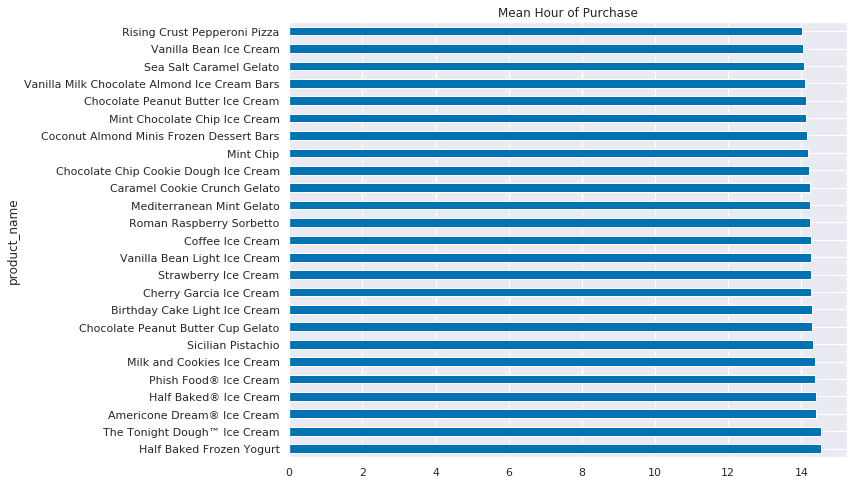

In [119]:
afternoon.plot(x="product_name",y="mean_hour", kind="barh", figsize=(10,8), legend=False, title="Mean Hour of Purchase")

Return list of top 25 late-purchase items

In [91]:
afternoon["product_name"].tolist()

['Half Baked Frozen Yogurt',
 'The Tonight Dough™ Ice Cream',
 'Americone Dream® Ice Cream',
 'Half Baked® Ice Cream',
 'Phish Food® Ice Cream',
 'Milk and Cookies Ice Cream',
 'Sicilian Pistachio',
 'Chocolate Peanut Butter Cup Gelato',
 'Birthday Cake Light Ice Cream',
 'Cherry Garcia Ice Cream',
 'Strawberry Ice Cream',
 'Vanilla Bean Light Ice Cream',
 'Coffee Ice Cream',
 'Roman Raspberry Sorbetto',
 'Mediterranean Mint Gelato',
 'Caramel Cookie Crunch Gelato',
 'Chocolate Chip Cookie Dough Ice Cream',
 'Mint Chip',
 'Coconut Almond Minis Frozen Dessert Bars',
 'Mint Chocolate Chip Ice Cream',
 'Chocolate Peanut Butter Ice Cream',
 'Vanilla Milk Chocolate Almond Ice Cream Bars',
 'Sea Salt Caramel Gelato',
 'Vanilla Bean Ice Cream',
 'Rising Crust Pepperoni Pizza']

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"

Perform similar subsetting for lowest mean order hours. Select bottom 25

In [92]:
morning = mean_hour.sort_values('mean_hour')[:25]
morning = morning.merge(products_df, on='product_id')
morning.head()

,product_id,mean_hour,product_name,aisle_id,department_id
0,9292,11.767279,Half And Half Ultra Pasteurized,84,16
1,46562,11.898340,Sweet & Salty Nut Granola Bars Peanut,3,19
2,45051,12.004019,Pub Mix,107,19
3,36472,12.049459,Nutri Grain Bars Multi Pack,48,14
4,37710,12.059043,Trail Mix,125,19


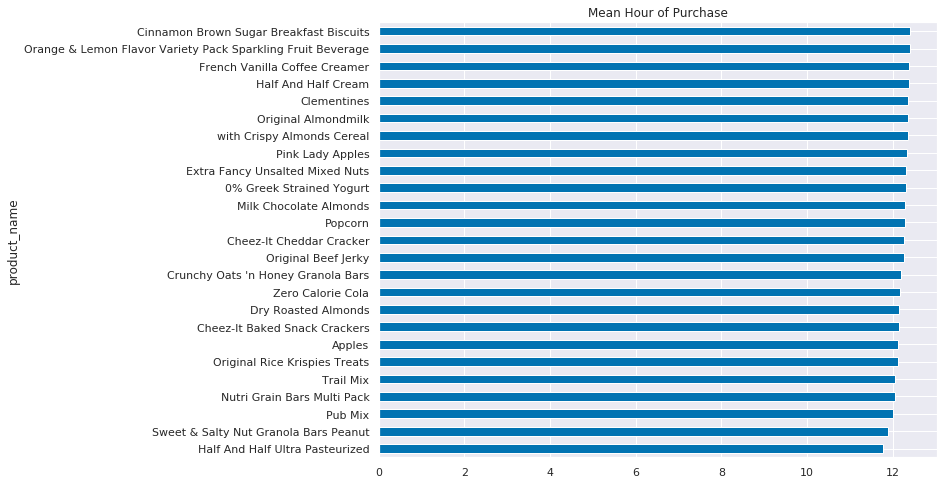

In [120]:
morning.plot(x="product_name",y="mean_hour", kind="barh", figsize=(10,8), legend=False, title="Mean Hour of Purchase")

Separate data into morning and evening dataframes. Join hourly product orders with the morning subset

In [127]:
morning_pct = product_orders_by_hour.merge(morning, on='product_id').sort_values(['mean_hour', 'order_hour_of_day'])
morning_pct

,product_id,order_hour_of_day,count,pct,mean_hour,product_name,aisle_id,department_id
48,9292,0,6,0.200334,11.767279,Half And Half Ultra Pasteurized,84,16
49,9292,1,1,0.033389,11.767279,Half And Half Ultra Pasteurized,84,16
50,9292,2,1,0.033389,11.767279,Half And Half Ultra Pasteurized,84,16
51,9292,4,1,0.033389,11.767279,Half And Half Ultra Pasteurized,84,16
52,9292,5,4,0.133556,11.767279,Half And Half Ultra Pasteurized,84,16
...,...,...,...,...,...,...,...,...
305,30591,19,71,1.935660,12.409215,Cinnamon Brown Sugar Breakfast Biscuits,48,14
306,30591,20,55,1.499455,12.409215,Cinnamon Brown Sugar Breakfast Biscuits,48,14
307,30591,21,50,1.363141,12.409215,Cinnamon Brown Sugar Breakfast Biscuits,48,14
308,30591,22,32,0.872410,12.409215,Cinnamon Brown Sugar Breakfast Biscuits,48,14


In [128]:
afternoon_pct = product_orders_by_hour.merge(afternoon, on='product_id').sort_values(['mean_hour', 'order_hour_of_day'], ascending=False)
afternoon_pct

,product_id,order_hour_of_day,count,pct,mean_hour,product_name,aisle_id,department_id
311,30668,23,36,1.206839,14.526986,Half Baked Frozen Yogurt,37,1
310,30668,22,49,1.642642,14.526986,Half Baked Frozen Yogurt,37,1
309,30668,21,86,2.883004,14.526986,Half Baked Frozen Yogurt,37,1
308,30668,20,147,4.927925,14.526986,Half Baked Frozen Yogurt,37,1
307,30668,19,198,6.637613,14.526986,Half Baked Frozen Yogurt,37,1
...,...,...,...,...,...,...,...,...
244,27179,4,5,0.129433,14.027699,Rising Crust Pepperoni Pizza,79,1
243,27179,3,6,0.155320,14.027699,Rising Crust Pepperoni Pizza,79,1
242,27179,2,9,0.232980,14.027699,Rising Crust Pepperoni Pizza,79,1
241,27179,1,9,0.232980,14.027699,Rising Crust Pepperoni Pizza,79,1


Make some convenience lists of each grouping of product names. Use "\n" to enter new lines between list entries

In [129]:
morning_product_names = list(morning_pct['product_name'].unique())
morning_product_names = '\n'.join(morning_product_names)
morning_product_names

"Half And Half Ultra Pasteurized\nSweet & Salty Nut Granola Bars Peanut\nPub Mix\nNutri Grain Bars Multi Pack\nTrail Mix\nOriginal Rice Krispies Treats\nApples\nCheez-It Baked Snack Crackers\nDry Roasted Almonds\nZero Calorie Cola\nCrunchy Oats 'n Honey Granola Bars\nOriginal Beef Jerky\nCheez-It Cheddar Cracker\nPopcorn\nMilk Chocolate Almonds\n0% Greek Strained Yogurt\nExtra Fancy Unsalted Mixed Nuts\nPink Lady Apples\nwith Crispy Almonds Cereal\nOriginal Almondmilk\nClementines\nHalf And Half Cream\nFrench Vanilla Coffee Creamer\nOrange & Lemon Flavor Variety Pack Sparkling Fruit Beverage\nCinnamon Brown Sugar Breakfast Biscuits"

In [130]:
afternoon_product_names = list(afternoon_pct['product_name'].unique())
afternoon_product_names = '\n'.join(afternoon_product_names)
afternoon_product_names


'Half Baked Frozen Yogurt\nThe Tonight Dough™ Ice Cream\nAmericone Dream® Ice Cream\nHalf Baked® Ice Cream\nPhish Food® Ice Cream\nMilk and Cookies Ice Cream\nSicilian Pistachio\nChocolate Peanut Butter Cup Gelato\nBirthday Cake Light Ice Cream\nCherry Garcia Ice Cream\nStrawberry Ice Cream\nVanilla Bean Light Ice Cream\nCoffee Ice Cream\nRoman Raspberry Sorbetto\nMediterranean Mint Gelato\nCaramel Cookie Crunch Gelato\nChocolate Chip Cookie Dough Ice Cream\nMint Chip\nCoconut Almond Minis Frozen Dessert Bars\nMint Chocolate Chip Ice Cream\nChocolate Peanut Butter Ice Cream\nVanilla Milk Chocolate Almond Ice Cream Bars\nSea Salt Caramel Gelato\nVanilla Bean Ice Cream\nRising Crust Pepperoni Pizza'

In [0]:
# Nitpicky data formatting to remove 'Variety Pack' from Orange & Lemon Flavor Variety Pack Sparkling Fruit Beverage
#Prevent figure/label overlap
morning_product_names = morning_product_names.replace('Variety Pack ', '')

Import pyplot module of matplotlib for visualization

In [0]:
import matplotlib.pyplot as plt

Largely copy-pasted, with my own styling flair in terms of color choice. 

Text(0.5, 1.0, "The InstaCart Chart...Now I'm Hungry")

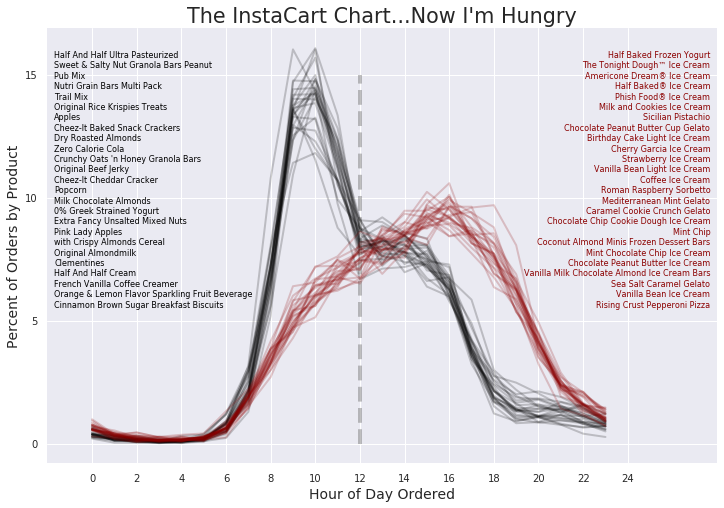

In [139]:
# Figure Size
fig, ax = plt.subplots(figsize=(12, 8))

# Plot
morning_pct.groupby('product_id').plot(x='order_hour_of_day', 
                                       y='pct', 
                                       ax=ax, 
                                       legend=False,
                                       alpha=0.2,
                                       aa=True,
                                       color='black',
                                       linewidth=2,)
afternoon_pct.groupby('product_id').plot(x='order_hour_of_day', 
                                         y='pct', 
                                         ax=ax, 
                                         legend=False,
                                         alpha=0.2,
                                         aa=True,
                                         color='darkred',
                                         linewidth=2,)

# Aesthetics
# Margins
plt.margins(x=0.5, y=0.05)

# Hide spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Labels
label_font_size = 14
plt.xlabel('Hour of Day Ordered', fontsize=label_font_size)
plt.ylabel('Percent of Orders by Product', fontsize=label_font_size)

# Tick Range
tick_font_size = 10
ax.tick_params(labelsize=tick_font_size)
plt.xticks(range(0, 25, 2))
plt.yticks(range(0, 16, 5))
plt.xlim([-2, 28])

# Vertical line at noon
plt.vlines(x=12, ymin=0, ymax=15, alpha=0.5, color='gray', linestyle='dashed', linewidth=4.0)

# Text
text_font_size = 8
ax.text(0.01, 0.95, morning_product_names,
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='black', fontsize=text_font_size)
ax.text(0.99, 0.95, afternoon_product_names,
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='darkred', fontsize=text_font_size);

plt.title("The InstaCart Chart...Now I'm Hungry", size="xx-large")

- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

---

Calculate morning popular products for visualization